In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
def linear_quantile_minimization(X, y, alpha = .1, stepsize = 0.01, n_iter = 1000):

    X_tilde = np.concatenate((np.ones((X.shape[0],1)),X), axis = 1)

    optim_track = np.zeros(n_iter)
    
    theta = np.zeros((X_tilde.shape[1],1))

    for t in np.arange(n_iter):

        scores = np.abs(y - X_tilde.dot(theta).ravel())
        k = int(np.ceil( (len(scores) + 1)*(1-alpha) ))
        quant = np.sort(scores)[k-1]

        optim_track[t] = quant

        ind_quant = np.where(scores == quant)[0]

        grad = -np.sign(y[ind_quant] - X_tilde[ind_quant,:].dot(theta))*X_tilde[ind_quant,:]

        theta = theta - stepsize*grad.reshape((-1,1))


    return theta, optim_track   

In [3]:
eta = .01
ntest = 1000


nxp = 20

result = np.zeros((nxp,10,10))

In [4]:
for xp in range(nxp):
    size_reg = []
    size_EffOrt = []
    for n_l in np.arange(10,101,10):
        for n_c in np.arange(10,101,10):
            n = n_l + n_c
    
            X = np.random.normal(size=n)
            
            ber = np.random.binomial(size=n, n=1, p= 0.95)
            
            Y = np.sin(X) + ber*np.random.normal(0, .1, n) + (1-ber)*np.random.normal(10, .1, n)
            
            Y[0] = 100
            #Y = np.sin(X) + np.random.standard_cauchy(n)
            
            
            Xtrain = X[:n_l]
            Xcalib = X[n_l:]
            
            ytrain = Y[:n_l]
            ycalib = Y[n_l:]
            
            
            Xtest = np.random.normal(size=ntest)
            
            ber_test = np.random.binomial(size=ntest, n=1, p= 0.95)
            
            ytest = np.sin(Xtest) + ber_test*np.random.normal(0, .1, ntest) + (1-ber_test)*np.random.normal(10, .1, ntest)
            #ytest = np.sin(Xtest) +  np.random.standard_cauchy(ntest)
    
            reg = LinearRegression().fit(np.sin(Xtrain).reshape((-1, 1)), ytrain)
            scores = abs(reg.predict(np.sin(Xcalib).reshape((-1, 1))) - ycalib)
            
    
            qreg, opt_track = linear_quantile_minimization(np.sin(Xtrain).reshape((-1, 1)), ytrain, stepsize = eta)
            qscores = np.abs(ycalib - np.concatenate((np.ones((np.sin(Xcalib).reshape((-1, 1)).shape[0],1)),
                                                      np.sin(Xcalib).reshape((-1, 1))), axis = 1).dot(qreg).ravel())
    
    
            alpha = .1
            k = int(np.ceil( (len(scores) + 1)*(1-alpha) ))
            q = np.sort(scores)[k-1]
            q_new = np.sort(qscores)[k-1]
    
            size_reg += [q]
            size_EffOrt += [q_new]
            
    size_reg = np.array(size_reg).reshape((10,10))
    size_EffOrt = np.array(size_EffOrt).reshape((10,10))

    result[xp,:,:] = size_EffOrt

In [43]:
np.mean(result,0)

array([[15.17208106, 14.93181328, 14.27697477, 15.23863609, 15.11890004,
        15.13826323, 16.34869292, 14.90508581, 16.30683974, 14.66440504],
       [ 5.24075249,  4.00508936,  3.41758663,  3.93304338,  2.90758136,
         3.40467642,  3.75230537,  3.62180565,  4.15305529,  3.63986925],
       [ 3.69157056,  5.39356415,  3.28105032,  2.66202481,  2.93493812,
         3.16096727,  3.13634829,  3.18208486,  2.66829284,  1.68235881],
       [ 6.24126   ,  2.70608256,  2.96911749,  2.37469885,  2.88883509,
         2.41743661,  2.16589463,  2.40375046,  2.95328526,  0.70488516],
       [ 4.12769803,  2.23167984,  3.36933676,  0.48129079,  2.63641251,
         1.69942919,  1.70068592,  2.17001666,  1.67509045,  1.66714231],
       [ 4.12135121,  4.92871403,  1.69571652,  2.18238435,  0.47285345,
         1.44614667,  2.88844099,  1.9184962 ,  1.43742368,  1.17008818],
       [ 4.00091548,  1.93615044,  3.70810658,  0.95042998,  1.71176604,
         1.17791169,  1.41910474,  1.4466063 

In [34]:
size_EffOrt = np.array(size_EffOrt).reshape((10,10))

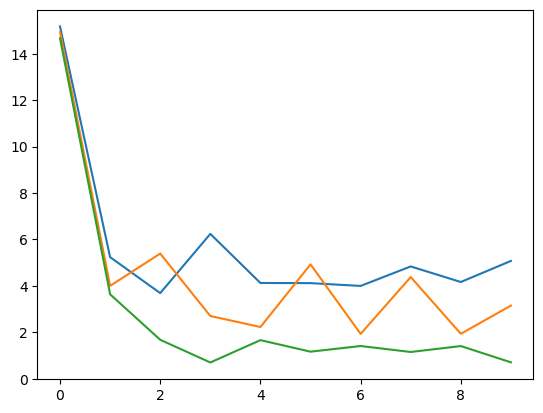

In [46]:
plt.plot(np.mean(result,0)[:,0])
plt.plot(np.mean(result,0)[:,1])
plt.plot(np.mean(result,0)[:,9])

In [29]:
np.arange(10,101,5)

array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
        75,  80,  85,  90,  95, 100])